In [1]:
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Загрузка данных из CSV файла
data = pd.read_csv('../train_h.csv')
data.head()

request_ts                           user_id                   referer  \
0  1701011363  fb858e8e0a2bec074450eaf94b627fd3          https://9b48ee5/   
1  1700986581  46a5f128fd569c764a92c2eaa788095e          https://9b48ee5/   
2  1701011071  5a74e9ac53ffb21a20cce117c0ad77ba  https://9634fd0/1409e548   
3  1700992803  af735816ca19115431ae3d89518c8c91          https://9b48ee5/   
4  1701021666  364f0ae0a3f29a685c4fb5bae6033b9a          https://9b48ee5/   

   geo_id  component0  component1  component2  component3  component4  \
0    4799       11731        4045       22213       -1184       -8992   
1    8257       11731        4045       22213       -1184       -8992   
2    3150       12498        2451       10304       -6380       11608   
3    2740       11731        4045       22213       -1184       -8992   
4    4863       11731        4045       22213       -1184       -8992   

   component5  ...  component8  component9  country_id  region_id timezone_id  \
0        9381  ...        -899       16817      c31b4e     470e75      f6155e   
1        9381  ...        -899       16817      c31b4e     44520b      e56e80   
2        3106  ...        3347       21870      c31b4e     616bb9      af47f1   
3        9381  ...        -899       16817      c31b4e     3c9dca      e56e80   
4        9381  ...        -899       16817      c31b4e     776e76     10b7947   

          browser browser_version       os os_version target  
0   Chrome Mobile         119.0.0  Android         10      0  
1   Chrome Mobile         111.0.0  Android         10      0  
2  Yandex Browser         20.12.5  Android         11      0  
3   Chrome Mobile         119.0.0  Android         10      0  
4  Yandex Browser         18.11.1  Android      4.4.4      0  

[5 rows x 22 columns]

In [3]:
label_encoder_browser_combined = LabelEncoder()

data['browser_combined'] = data['browser'] + ' ' + data['browser_version']
data['browser_combined_encoded'] = label_encoder_browser_combined.fit_transform(data['browser_combined'])

# Применяем его к колонке 'browser'
os_mapping = dict(zip(label_encoder_browser_combined.classes_, label_encoder_browser_combined.transform(label_encoder_browser_combined.classes_)))

print("Сопоставление браузеров с кодами:")
for browser, code in os_mapping.items():
    print(f"{browser}: {code}")

Сопоставление браузеров с кодами:
Amazon Silk 108.7.2: 0
Amazon Silk 114.2.7: 1
Amazon Silk 118.1.77: 2
Amazon Silk 118.1.84: 3
Amazon Silk 81.2.16: 4
Android 4.1.2: 5
Android 4.2.2: 6
Apple Mail 605.1.15: 7
Basilisk 102.0.52: 8
Bot 24.5.9: 9
Chrome 100.0.4896: 10
Chrome 101.0.0: 11
Chrome 101.0.4900: 12
Chrome 101.0.4951: 13
Chrome 101.0.9999: 14
Chrome 102.0.0: 15
Chrome 102.0.5005: 16
Chrome 102.0.9999: 17
Chrome 103.0.0: 18
Chrome 103.0.5060: 19
Chrome 104.0.0: 20
Chrome 104.0.5112: 21
Chrome 105.0.0: 22
Chrome 105.0.5173: 23
Chrome 106.0.0: 24
Chrome 107.0.0: 25
Chrome 107.0.5304: 26
Chrome 108.0.0: 27
Chrome 108.0.5359: 28
Chrome 109.0.0: 29
Chrome 109.0.5414: 30
Chrome 110.0.0: 31
Chrome 110.0.5481: 32
Chrome 111.0.0: 33
Chrome 111.0.5405: 34
Chrome 111.0.5563: 35
Chrome 112.0.0: 36
Chrome 112.0.5615: 37
Chrome 113.0.0: 38
Chrome 114.0.0: 39
Chrome 114.0.5735: 40
Chrome 115.0.0: 41
Chrome 115.0.5790: 42
Chrome 116.0.0: 43
Chrome 116.0.5838: 44
Chrome 116.0.5845: 45
Chrome 117.0.

In [4]:
label_encoder_os_combined = LabelEncoder()

data['os_combined'] = data['os'] + ' ' + data['os_version']
data['os_combined_encoded'] = label_encoder_os_combined.fit_transform(data['os_combined'])

# Применяем его к колонке 'browser'
os_mapping = dict(zip(label_encoder_os_combined.classes_, label_encoder_os_combined.transform(label_encoder_os_combined.classes_)))

print("Сопоставление ОС с кодами:")
for os, code in os_mapping.items():
    print(f"{os}: {code}")

Сопоставление ОС с кодами:
Android 10: 0
Android 10.0: 1
Android 11: 2
Android 11.0: 3
Android 11.0.0: 4
Android 12: 5
Android 12.0: 6
Android 12.0.0: 7
Android 13: 8
Android 13.0: 9
Android 14: 10
Android 23.110.1: 11
Android 23.92.1: 12
Android 23.96.1: 13
Android 4.1.2: 14
Android 4.2.1: 15
Android 4.2.2: 16
Android 4.3: 17
Android 4.4.2: 18
Android 4.4.3: 19
Android 4.4.4: 20
Android 5.0: 21
Android 5.0.1: 22
Android 5.0.2: 23
Android 5.1: 24
Android 5.1.1: 25
Android 6.0: 26
Android 6.0.1: 27
Android 6.6.2: 28
Android 7.0: 29
Android 7.0.0: 30
Android 7.1.1: 31
Android 7.1.2: 32
Android 8: 33
Android 8.0: 34
Android 8.0.0: 35
Android 8.1: 36
Android 8.1.0: 37
Android 8.1.99: 38
Android 9: 39
Android 9.0: 40
Android 9.0.0: 41
Chrome OS 10718.88.2: 42
Chrome OS 12105.100.0: 43
Chrome OS 12239.92.0: 44
Chrome OS 12371.89.0: 45
Chrome OS 13816.80.0: 46
Chrome OS 13904.97.0: 47
Chrome OS 14092.77.0: 48
Chrome OS 14541.0.0: 49
Chrome OS 14816.131.0: 50
Mac OS X 10.10: 51
Mac OS X 10.10.

In [5]:
label_encoder_browser = LabelEncoder()

data['browser_encoded'] = label_encoder_browser.fit_transform(data['browser'])

os_mapping = dict(zip(label_encoder_browser.classes_, label_encoder_browser.transform(label_encoder_browser.classes_)))

print("Сопоставление браузеров с кодами:")
for browser, code in os_mapping.items():
    print(f"{browser}: {code}")

Сопоставление браузеров с кодами:
Amazon Silk: 0
Android: 1
Apple Mail: 2
Basilisk: 3
Bot: 4
Chrome: 5
Chrome Mobile: 6
Chrome Mobile WebView: 7
Chrome Mobile iOS: 8
Dragon: 9
DuckDuckGo Mobile: 10
Edge: 11
Edge Mobile: 12
Electron: 13
Facebook: 14
Firefox: 15
Firefox Mobile: 16
Firefox iOS: 17
Flipboard: 18
Flipboard-Briefing: 19
Google: 20
HeadlessChrome: 21
IE: 22
IE Mobile: 23
Instagram: 24
Iron: 25
Mail.ru Chromium Browser: 26
Maxthon: 27
Mint Browser: 28
MiuiBrowser: 29
Mobile Safari: 30
Mobile Safari UI/WKWebView: 31
Opera: 32
Opera Coast: 33
Opera Mini: 34
Opera Mobile: 35
Pale Moon: 36
Phantom: 37
Safari: 38
Samsung Internet: 39
SeaMonkey: 40
Seznam prohlížeč: 41
UC Browser: 42
Vivaldi: 43
Waterfox: 44
Whale: 45
Yandex Browser: 46
YandexSearch: 47


In [6]:
label_encoder_os = LabelEncoder()

data['os_encoded'] = label_encoder_os.fit_transform(data['os'])

os_mapping = dict(zip(label_encoder_os.classes_, label_encoder_os.transform(label_encoder_os.classes_)))

print("Сопоставление ОС с кодами:")
for os, code in os_mapping.items():
    print(f"{os}: {code}")

Сопоставление ОС с кодами:
Android: 0
Chrome OS: 1
Mac OS X: 2
Tizen: 3
Windows: 4
Windows Phone: 5
iOS: 6


In [7]:
data.head()

request_ts                           user_id                   referer  \
0  1701011363  fb858e8e0a2bec074450eaf94b627fd3          https://9b48ee5/   
1  1700986581  46a5f128fd569c764a92c2eaa788095e          https://9b48ee5/   
2  1701011071  5a74e9ac53ffb21a20cce117c0ad77ba  https://9634fd0/1409e548   
3  1700992803  af735816ca19115431ae3d89518c8c91          https://9b48ee5/   
4  1701021666  364f0ae0a3f29a685c4fb5bae6033b9a          https://9b48ee5/   

   geo_id  component0  component1  component2  component3  component4  \
0    4799       11731        4045       22213       -1184       -8992   
1    8257       11731        4045       22213       -1184       -8992   
2    3150       12498        2451       10304       -6380       11608   
3    2740       11731        4045       22213       -1184       -8992   
4    4863       11731        4045       22213       -1184       -8992   

   component5  ...  browser_version       os  os_version  target  \
0        9381  ...          119.0.0  Android          10       0   
1        9381  ...          111.0.0  Android          10       0   
2        3106  ...          20.12.5  Android          11       0   
3        9381  ...          119.0.0  Android          10       0   
4        9381  ...          18.11.1  Android       4.4.4       0   

         browser_combined browser_combined_encoded    os_combined  \
0   Chrome Mobile 119.0.0                      187     Android 10   
1   Chrome Mobile 111.0.0                      150     Android 10   
2  Yandex Browser 20.12.5                     1348     Android 11   
3   Chrome Mobile 119.0.0                      187     Android 10   
4  Yandex Browser 18.11.1                     1280  Android 4.4.4   

  os_combined_encoded browser_encoded os_encoded  
0                   0               6          0  
1                   0               6          0  
2                   2              46          0  
3                   0               6          0  
4                  20              46          0  

[5 rows x 28 columns]

In [8]:
label_encoder_refer = LabelEncoder()

data['referer_encoded'] = label_encoder_refer.fit_transform(data['referer'])

os_mapping = dict(zip(label_encoder_refer.classes_, label_encoder_refer.transform(label_encoder_refer.classes_)))

print("Сопоставление referer с кодами:")
for os, code in os_mapping.items():
    print(f"{os}: {code}")

Сопоставление referer с кодами:
https://5f5f345/: 0
https://5f5f345/11f27d99: 1
https://5f5f345/11f44f47: 2
https://5f5f345/120bc750: 3
https://5f5f345/120f8148: 4
https://5f5f345/12179694: 5
https://5f5f345/1227d175: 6
https://5f5f345/123a0008: 7
https://5f5f345/1241ab48: 8
https://5f5f345/1252205b: 9
https://5f5f345/12544186: 10
https://5f5f345/1254f936: 11
https://5f5f345/12941e1a: 12
https://5f5f345/129a9a54: 13
https://5f5f345/129b5fcd: 14
https://5f5f345/12a725af: 15
https://5f5f345/12ad1d2b: 16
https://5f5f345/12c2d9ff: 17
https://5f5f345/12c73e7d: 18
https://5f5f345/12cc35ce: 19
https://5f5f345/12d20015: 20
https://5f5f345/12e72713: 21
https://5f5f345/12e80489: 22
https://5f5f345/12f68f4b: 23
https://5f5f345/12fcd42f: 24
https://5f5f345/130383b9: 25
https://5f5f345/130c9465: 26
https://5f5f345/130f3d59: 27
https://5f5f345/131c9f82: 28
https://5f5f345/13240274: 29
https://5f5f345/1326b01c: 30
https://5f5f345/132a16e4: 31
https://5f5f345/132bdf46: 32
https://5f5f345/132cf00a: 33


In [9]:
label_encoder_country_id = LabelEncoder()

data['country_id_encoded'] = label_encoder_country_id.fit_transform(data['country_id'])

os_mapping = dict(zip(label_encoder_country_id.classes_, label_encoder_country_id.transform(label_encoder_country_id.classes_)))

print("Сопоставление country_id с кодами:")
for os, code in os_mapping.items():
    print(f"{os}: {code}")

Сопоставление country_id с кодами:
103bf7d: 0
110628b: 1
121db33: 2
122be0f: 3
1234f1d: 4
ac5671: 5
af12ca: 6
b98648: 7
c31b4e: 8
e37756: 9
eba88b: 10
ff9306: 11


In [10]:
label_encoder_region_id = LabelEncoder()

data['region_id_encoded'] = label_encoder_region_id.fit_transform(data['region_id'])

os_mapping = dict(zip(label_encoder_region_id.classes_, label_encoder_region_id.transform(label_encoder_region_id.classes_)))

print("Сопоставление region_id с кодами:")
for os, code in os_mapping.items():
    print(f"{os}: {code}")

Сопоставление region_id с кодами:
102f73: 0
10a54a: 1
10ee0e: 2
111b0a: 3
11704d: 4
12299b: 5
122b1b: 6
1326d0: 7
144f47: 8
148056: 9
152036: 10
15462d: 11
15a554: 12
15b418: 13
15e0e9: 14
160bf3: 15
1819a2: 16
187ee3: 17
1943cd: 18
19dc38: 19
1b18a1: 20
1bf7bf: 21
1c8a80: 22
1ca27d: 23
1ca4c9: 24
1d3018: 25
1d4cf7: 26
1fb83f: 27
1fbfa5: 28
1fc79f: 29
200d3c: 30
2066c7: 31
2090c5: 32
20b6f7: 33
214320: 34
21a759: 35
21d92d: 36
21e52f: 37
221ceb: 38
22944c: 39
229b54: 40
229e5f: 41
238edd: 42
239fcc: 43
23f650: 44
23f9c2: 45
241b43: 46
24389d: 47
245864: 48
247d24: 49
24b643: 50
24dd7b: 51
26eb05: 52
26f66d: 53
271d5c: 54
278ed8: 55
27f4bb: 56
2816bf: 57
28d2d6: 58
28f168: 59
290508: 60
297174: 61
2aba02: 62
2adb53: 63
2b3ca3: 64
2c3ff3: 65
2c9e8f: 66
2d7eb6: 67
2d97a6: 68
2dda09: 69
2dffbc: 70
2e3fbd: 71
2e8588: 72
2ed96a: 73
2f1b83: 74
2f89a3: 75
30af3a: 76
312358: 77
312724: 78
324936: 79
325fef: 80
33ed7a: 81
33ffc7: 82
3500ed: 83
355315: 84
368648: 85
36e3f3: 86
37246e: 87
37e04e: 

In [11]:
label_encoder_timezone_id = LabelEncoder()

data['timezone_id_encoded'] = label_encoder_timezone_id.fit_transform(data['timezone_id'])

os_mapping = dict(zip(label_encoder_timezone_id.classes_, label_encoder_timezone_id.transform(label_encoder_timezone_id.classes_)))

print("Сопоставление timezone_id с кодами:")
for os, code in os_mapping.items():
    print(f"{os}: {code}")

Сопоставление timezone_id с кодами:
1041045: 0
1054b86: 1
109a080: 2
10a9e23: 3
10b11be: 4
10b7947: 5
10ba90d: 6
115b511: 7
11975eb: 8
11a38d2: 9
12119c5: 10
122944d: 11
124b6f2: 12
124ce1d: 13
12bec9f: 14
1304d52: 15
992ebe: 16
9cdb77: 17
ab90ca: 18
abea49: 19
ac9429: 20
accf88: 21
ad8d84: 22
af47f1: 23
b017ac: 24
b4a275: 25
b7096b: 26
b72333: 27
be683c: 28
c0b986: 29
c1ffd0: 30
c56e83: 31
c65773: 32
c7030f: 33
ca5519: 34
ca5e36: 35
caf0e9: 36
cb876b: 37
cde24c: 38
cea125: 39
ced83d: 40
d5b4d6: 41
d6f683: 42
d903ee: 43
d93ac7: 44
dc32f4: 45
dd8d07: 46
df194e: 47
e38b8d: 48
e3abc2: 49
e56e80: 50
e7021b: 51
eb8296: 52
ef97a6: 53
f55fca: 54
f6155e: 55
f7f7b5: 56
fb36b2: 57
fcada0: 58
fcd4df: 59
fd4ddf: 60


In [12]:
X = data.drop(columns=['target', 'user_id', 'browser_version', 'os_version', 'browser', 'os', 'browser_combined', 'os_combined', 'referer', 'country_id', 'region_id', 'timezone_id'], axis=1)
y = data['target']

In [13]:
X.head()

request_ts  geo_id  component0  component1  component2  component3  \
0  1701011363    4799       11731        4045       22213       -1184   
1  1700986581    8257       11731        4045       22213       -1184   
2  1701011071    3150       12498        2451       10304       -6380   
3  1700992803    2740       11731        4045       22213       -1184   
4  1701021666    4863       11731        4045       22213       -1184   

   component4  component5  component6  component7  component8  component9  \
0       -8992        9381       -3496       -3120        -899       16817   
1       -8992        9381       -3496       -3120        -899       16817   
2       11608        3106       -2188       10573        3347       21870   
3       -8992        9381       -3496       -3120        -899       16817   
4       -8992        9381       -3496       -3120        -899       16817   

   browser_combined_encoded  os_combined_encoded  browser_encoded  os_encoded  \
0                       187                    0                6           0   
1                       150                    0                6           0   
2                      1348                    2               46           0   
3                       187                    0                6           0   
4                      1280                   20               46           0   

   referer_encoded  country_id_encoded  region_id_encoded  timezone_id_encoded  
0            81080                   8                116                   55  
1            81080                   8                111                   50  
2            72737                   8                160                   23  
3            81080                   8                 99                   50  
4            81080                   8                200                    5

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# for i in range(10, 15):# Инициализация модели CatBoost
#     model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=i, random_state=42)

#     # Обучение модели на тренировочных данных
#     model.fit(X_train, y_train)

#     # Прогнозирование на тестовом наборе
#     y_pred = model.predict(X_test)

# # Оценка точности модели
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f'Accuracy for depth = {i}: {accuracy:.4f}')

In [33]:
import matplotlib.pyplot as plt

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=15, random_state=42)
model.fit(X_train, y_train)

# Создаем массивы для хранения значений точности
train_accuracy = []
test_accuracy = []

# Проходим через каждую итерацию построения деревьев
for y_train_pred, y_test_pred in zip(model.staged_predict(X_train), model.staged_predict(X_test)):
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))



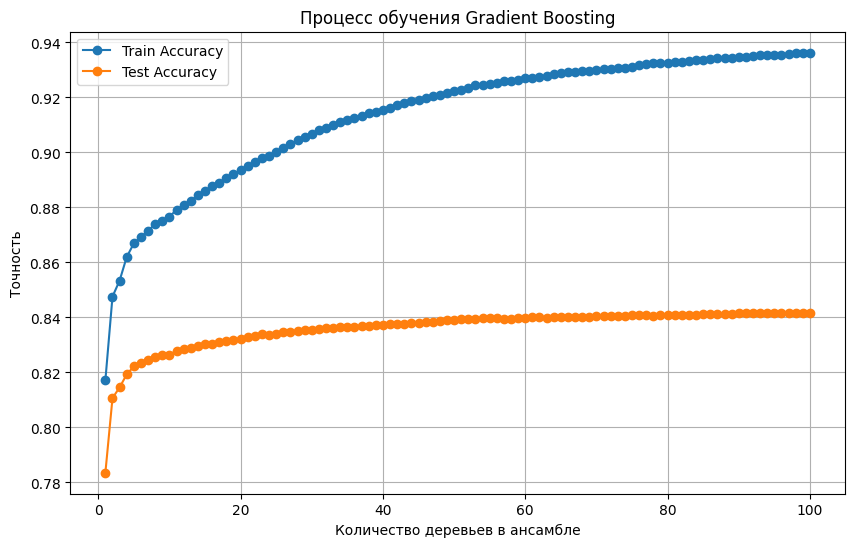

In [35]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), train_accuracy, label='Train Accuracy', marker='o')
plt.plot(range(1, 101), test_accuracy, label='Test Accuracy', marker='o')
plt.xlabel('Количество деревьев в ансамбле')
plt.ylabel('Точность')
plt.title('Процесс обучения Gradient Boosting')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8416
